<a href="https://colab.research.google.com/github/Naginder/learninglab/blob/master/DA_JobVacancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Get Data and Prepare Data**

In [1]:
#@title Get Job Vacancy Data from Data.Gov.Sg
import requests
from urllib.parse import urlparse, parse_qs

resource_id='d_f3ce4cb8ec1910a4d4699f0e2ecaa21a'

recordsjson=[]
base_url = "https://data.gov.sg"
url = base_url + "/api/action/datastore_search?resource_id="+resource_id+"&limit=1000"
hasnext=True

while hasnext:
  response = requests.get(url)
  recordsjson+=response.json()['result']['records']
  #print(response.json()['result']['records'][0])
  #print(response.json()['result']['_links']['next'])
  url=base_url+response.json()['result']['_links']['next']
  parsed = urlparse(url)
  offset = parse_qs(parsed.query)['offset'][0]
  #print(offset)
  total=(response.json()['result']['total'])
  #print(total)
  if int(offset)>total:
    hasnext=False

In [2]:
#@title Check number of records
len(recordsjson)

13764

In [3]:
#@title convert to Pandas Dataframe
import pandas as pd

records=pd.DataFrame.from_dict(recordsjson)
records

,_id,quarter,industry1,industry2,industry3,occupation1,job_vacancy
0,1,1998-Q1,total,total,total,total,26100
1,2,1998-Q1,total,total,total,"professional, managers, executive and technicians",6500
2,3,1998-Q1,total,total,total,"clerical, sales and services workers",8100
3,4,1998-Q1,total,total,total,"production and transport operators, cleaners a...",11500
4,5,1998-Q1,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",total,300
...,...,...,...,...,...,...,...
13759,13760,2024-Q1,services,"community, social and personal services","other community, social and personal services","production and transport operators, cleaners a...",400
13760,13761,2024-Q1,others,others,others,total,700
13761,13762,2024-Q1,others,others,others,"professional, managers, executive and technicians",500
13762,13763,2024-Q1,others,others,others,"clerical, sales and services workers",-


In [4]:
#@title Check for data quality
for col in records.columns:
  print(col,records[col].unique())

_id [    1     2     3 ... 13762 13763 13764]
quarter ['1998-Q1' '1998-Q2' '1998-Q3' '1998-Q4' '1999-Q1' '1999-Q2' '1999-Q3'
 '1999-Q4' '2000-Q1' '2000-Q2' '2000-Q3' '2000-Q4' '2001-Q1' '2001-Q2'
 '2001-Q3' '2001-Q4' '2002-Q1' '2002-Q2' '2002-Q3' '2002-Q4' '2003-Q1'
 '2003-Q2' '2003-Q3' '2003-Q4' '2004-Q1' '2004-Q2' '2004-Q3' '2004-Q4'
 '2005-Q1' '2005-Q2' '2005-Q3' '2005-Q4' '2006-Q1' '2006-Q2' '2006-Q3'
 '2006-Q4' '2007-Q1' '2007-Q2' '2007-Q3' '2007-Q4' '2008-Q1' '2008-Q2'
 '2008-Q3' '2008-Q4' '2009-Q1' '2009-Q2' '2009-Q3' '2009-Q4' '2010-Q1'
 '2010-Q2' '2010-Q3' '2010-Q4' '2011-Q1' '2011-Q2' '2011-Q3' '2011-Q4'
 '2012-Q1' '2012-Q2' '2012-Q3' '2012-Q4' '2013-Q1' '2013-Q2' '2013-Q3'
 '2013-Q4' '2014-Q1' '2014-Q2' '2014-Q3' '2014-Q4' '2015-Q1' '2015-Q2'
 '2015-Q3' '2015-Q4' '2016-Q1' '2016-Q2' '2016-Q3' '2016-Q4' '2017-Q1'
 '2017-Q2' '2017-Q3' '2017-Q4' '2018-Q1' '2018-Q2' '2018-Q3' '2018-Q4'
 '2019-Q1' '2019-Q2' '2019-Q3' '2019-Q4' '2020-Q1' '2020-Q2' '2020-Q3'
 '2020-Q4' '2021-Q1' '2

In [5]:
#@title Change to proper values and datatypes
records['job_vacancy'].mask(records['job_vacancy']=='-','0',inplace=True)
records=records.convert_dtypes()
records.info()
records['quarter']=pd.to_datetime(records['quarter'])
records['job_vacancy']=pd.to_numeric(records['job_vacancy'])
records.info()
len(records)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13764 entries, 0 to 13763
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          13764 non-null  Int64 
 1   quarter      13764 non-null  string
 2   industry1    13764 non-null  string
 3   industry2    13764 non-null  string
 4   industry3    13764 non-null  string
 5   occupation1  13764 non-null  string
 6   job_vacancy  13764 non-null  string
dtypes: Int64(1), string(6)
memory usage: 766.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13764 entries, 0 to 13763
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   _id          13764 non-null  Int64         
 1   quarter      13764 non-null  datetime64[ns]
 2   industry1    13764 non-null  string        
 3   industry2    13764 non-null  string        
 4   industry3    13764 non-null  string        
 5   occupation1  137

<ipython-input-5-ee673e47c944>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  records['quarter']=pd.to_datetime(records['quarter'])


13764

### **Diagnostic Analysis**

In [6]:
#@title filter data to only quarterly aggregates
recordstotal=records[(records['occupation1']=='total') & (records['industry1']=='total')].set_index('_id')
recordstotal

,quarter,industry1,industry2,industry3,occupation1,job_vacancy
_id,,,,,,
1,1998-01-01,total,total,total,total,26100
97,1998-04-01,total,total,total,total,19100
193,1998-07-01,total,total,total,total,15500
289,1998-10-01,total,total,total,total,12600
385,1999-01-01,total,total,total,total,16800
...,...,...,...,...,...,...
13105,2023-01-01,total,total,total,total,97400
13237,2023-04-01,total,total,total,total,89400
13369,2023-07-01,total,total,total,total,78100


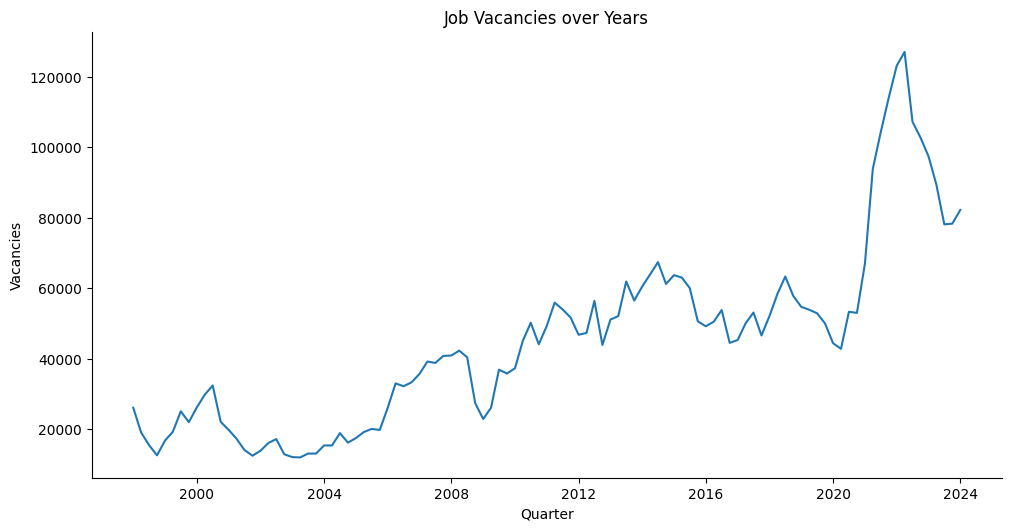

In [7]:
#@title Line graph for Total values
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
plt.plot(recordstotal['quarter'], recordstotal['job_vacancy'])
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quarter')
plt.ylabel('Vacancies')
plt.title('Job Vacancies over Years')
plt.savefig('jobvacancies.jpg')

In [8]:
#@title filter only for Occupation data
occrectotal=records[(records['occupation1']!='total') & (records['industry1']=='total')]
occrectotal=occrectotal.pivot(index='quarter',columns='occupation1',values='job_vacancy')
occrectotal

occupation1,"clerical, sales and services workers","production and transport operators, cleaners a...","professional, managers, executive and technicians"
quarter,,,
1998-01-01,8100,11500,6500
1998-04-01,7000,7000,5100
1998-07-01,4900,6400,4200
1998-10-01,4100,4600,3900
1999-01-01,5700,6500,4600
...,...,...,...
2023-01-01,21600,22000,53800
2023-04-01,20700,17300,51500
2023-07-01,18800,14700,44700


[]

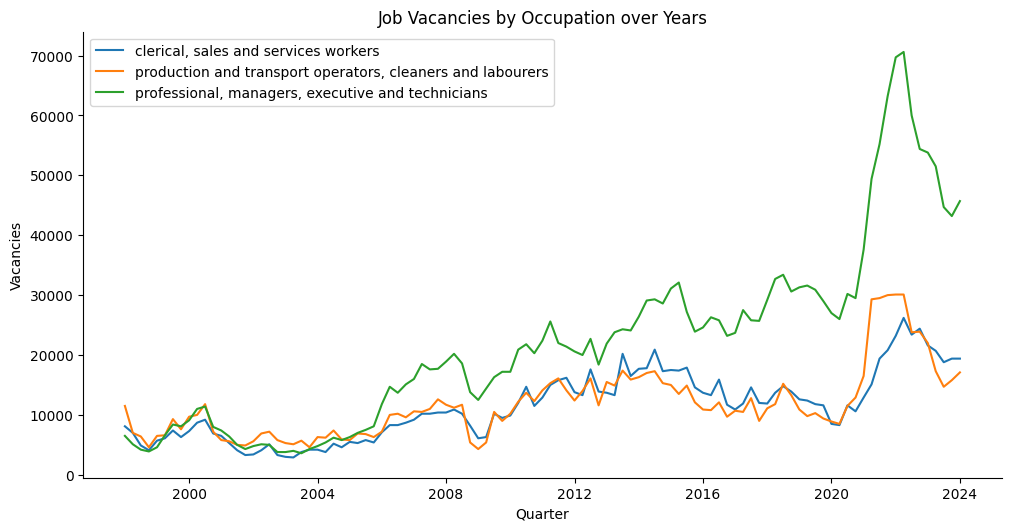

In [9]:
#@title check which Occupation had major changes
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
plt.plot(occrectotal,label=occrectotal.columns)
plt.legend()
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quarter')
plt.ylabel('Vacancies')
plt.title('Job Vacancies by Occupation over Years')
plt.plot()

In [10]:
#@title filter for only Industry 1 level
indrectotal=records[(records['occupation1']=='total') & (records['industry1']!='total')].groupby(['quarter','industry1']).sum(['job_vacancy']).reset_index()

indrectotal=indrectotal.pivot(index='quarter',columns='industry1',values='job_vacancy')
indrectotal

industry1,construction,manufacturing,others,services
quarter,,,,
1998-01-01,3700,8300,100,14100
1998-04-01,3100,4700,0,11400
1998-07-01,2600,4000,0,8600
1998-10-01,1200,3800,100,7400
1999-01-01,2600,4200,0,9900
...,...,...,...,...
2023-01-01,7700,9500,700,79400
2023-04-01,7200,8500,700,73000
2023-07-01,5900,6600,600,65000


[]

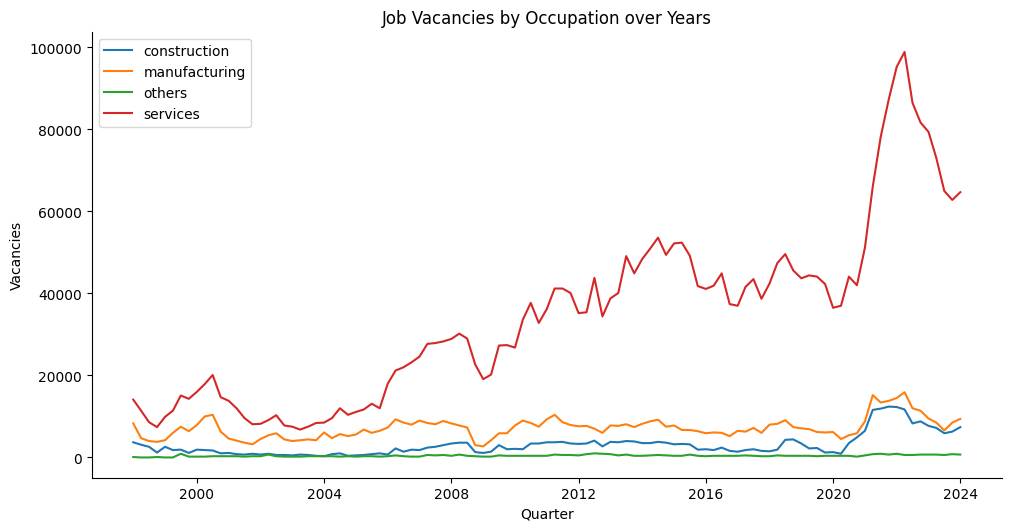

In [11]:
#@title Check for which Industry level 1 had major changes
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
plt.plot(indrectotal,label=indrectotal.columns)
plt.legend()
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quarter')
plt.ylabel('Vacancies')
plt.title('Job Vacancies by Occupation over Years')
plt.plot()

In [12]:
#@title filter now for Industry 2 and pivot Industries to Columns
import numpy as np # Import the numpy library

ind2rectotal=records[(records['occupation1']=='professional, managers, executive and technicians') & (records['industry1']=='services') & (records['industry2']!='total')].groupby(['quarter','industry1','industry2']).sum(['job_vacancy']).reset_index()
ind2rectotal=ind2rectotal.pivot(index='quarter',columns='industry2',values='job_vacancy')
ind2rectotal.replace(np.NaN,0,inplace=True) # Use np.NaN to represent "Not A Number"
ind2rectotal

industry2,accommodation and food services,administrative and support services,business and real estate services,"community, social and personal services",financial and insurance services,financial intermediation,financial services,hotels and restaurants,information and communications,professional services,real estate and leasing services,real estate services,transport and storage,"transport, storage and communications",transportation and storage,wholesale and retail trade
quarter,,,,,,,,,,,,,,,,
1998-01-01,0,0,900,1200,0,600,0,300,0,0,0,0,0,600,0,700
1998-04-01,0,0,700,1100,0,600,0,200,0,0,0,0,0,600,0,500
1998-07-01,0,0,600,900,0,400,0,0,0,0,0,0,0,500,0,400
1998-10-01,0,0,600,800,0,300,0,200,0,0,0,0,0,300,0,500
1999-01-01,0,0,800,900,0,400,0,200,0,0,0,0,0,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,2000,1800,0,15300,6700,0,0,0,7600,6300,0,1200,0,0,2100,4000
2023-04-01,2000,1200,0,17900,5600,0,0,0,6000,6000,0,1200,0,0,1000,3600
2023-07-01,1700,1500,0,14200,4800,0,0,0,6700,4800,0,700,0,0,1200,3400


[]

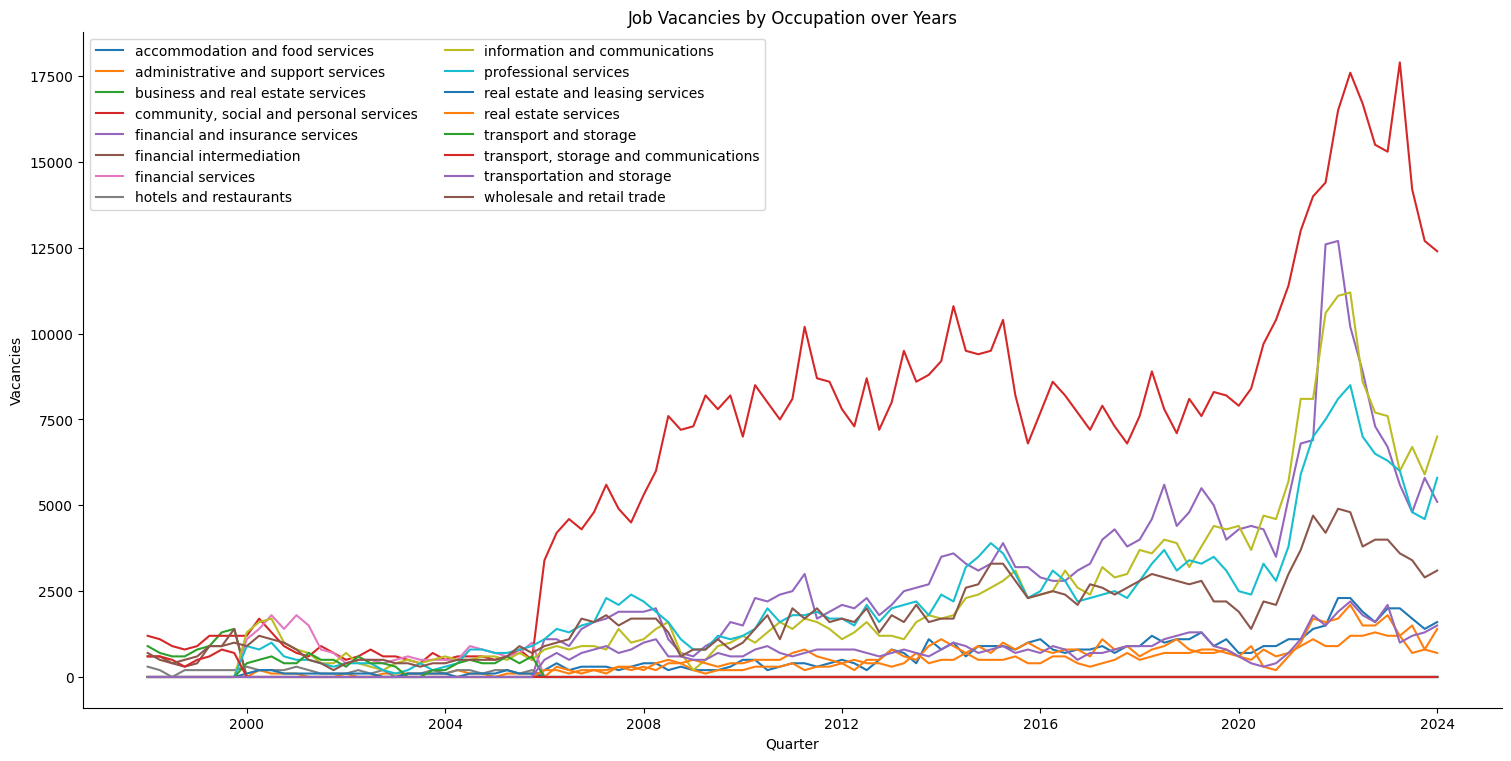

In [13]:
#@title Check which Industry level 2 had major changes
fig, ax = plt.subplots(figsize=(15, 7.5), layout='constrained')
plt.plot(ind2rectotal,label=ind2rectotal.columns)
plt.legend(ncol=2)
sns.despine(fig=fig, ax=ax)
plt.xlabel('Quarter')
plt.ylabel('Vacancies')
plt.title('Job Vacancies by Occupation over Years')
plt.plot()

In [14]:
#@title Check Standard Deviation to find dispersion of data points
ind2rectotal.describe()

industry2,accommodation and food services,administrative and support services,business and real estate services,"community, social and personal services",financial and insurance services,financial intermediation,financial services,hotels and restaurants,information and communications,professional services,real estate and leasing services,real estate services,transport and storage,"transport, storage and communications",transportation and storage,wholesale and retail trade
count,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0,105.0
mean,564.761905,499.047619,68.571429,6467.619048,2516.190476,52.380952,191.428571,51.428571,2347.619048,2178.095238,22.857143,397.142857,92.380952,43.809524,620.952381,1763.809524
std,578.290078,490.583491,252.416889,4612.493386,2634.574984,206.199697,408.589103,87.831007,2533.813455,1921.236629,48.550416,344.310108,189.480686,158.067542,524.715168,1137.48405
min,0.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0
25%,0.0,100.0,0.0,1200.0,0.0,0.0,0.0,0.0,700.0,800.0,0.0,0.0,0.0,0.0,0.0,800.0
50%,400.0,300.0,0.0,7500.0,2000.0,0.0,0.0,0.0,1400.0,1800.0,0.0,400.0,0.0,0.0,700.0,1700.0
75%,900.0,800.0,0.0,8700.0,3900.0,0.0,0.0,100.0,3100.0,3000.0,0.0,600.0,0.0,0.0,900.0,2600.0
max,2300.0,2100.0,1400.0,17900.0,12700.0,1400.0,1800.0,300.0,11200.0,8500.0,200.0,1300.0,700.0,800.0,2200.0,4900.0


### **Descriptive Analysis**

In [15]:
#@title Analysing Covid Data

import numpy as np
coviddata='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
coviddf=pd.read_csv(coviddata,index_col=0)
coviddf=pd.melt(coviddf[(coviddf['Country/Region']=='Singapore')],var_name='Date',value_name='cases')
coviddf=coviddf.drop([0,1,2]).convert_dtypes()
coviddf['quarter']=pd.PeriodIndex(pd.to_datetime(coviddf['Date']),freq='Q')
coviddf['Date']=pd.to_datetime(coviddf['Date'])
#coviddf=coviddf.set_index('Date')
coviddf=coviddf.groupby(['quarter']).agg({'cases':np.sum,'Date':np.min})
coviddf

<ipython-input-15-8a706b1196f3>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coviddf['quarter']=pd.PeriodIndex(pd.to_datetime(coviddf['Date']),freq='Q')
<ipython-input-15-8a706b1196f3>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  coviddf['Date']=pd.to_datetime(coviddf['Date'])


,cases,Date
quarter,,
2020Q1,13124,2020-01-22
2020Q2,2224053,2020-04-01
2020Q3,4913191,2020-07-01
2020Q4,5348274,2020-10-01
2021Q1,5369598,2021-01-01
2021Q2,5602557,2021-04-01
2021Q3,6326806,2021-07-01
2021Q4,20176802,2021-10-01
2022Q1,53354389,2022-01-01


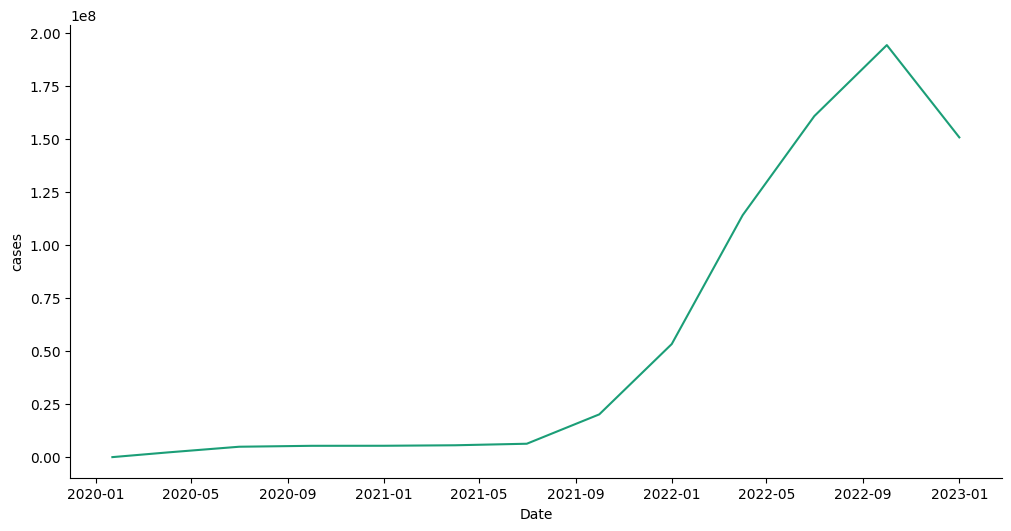

In [16]:
# @title Date vs cases

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['cases']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = coviddf.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('cases')

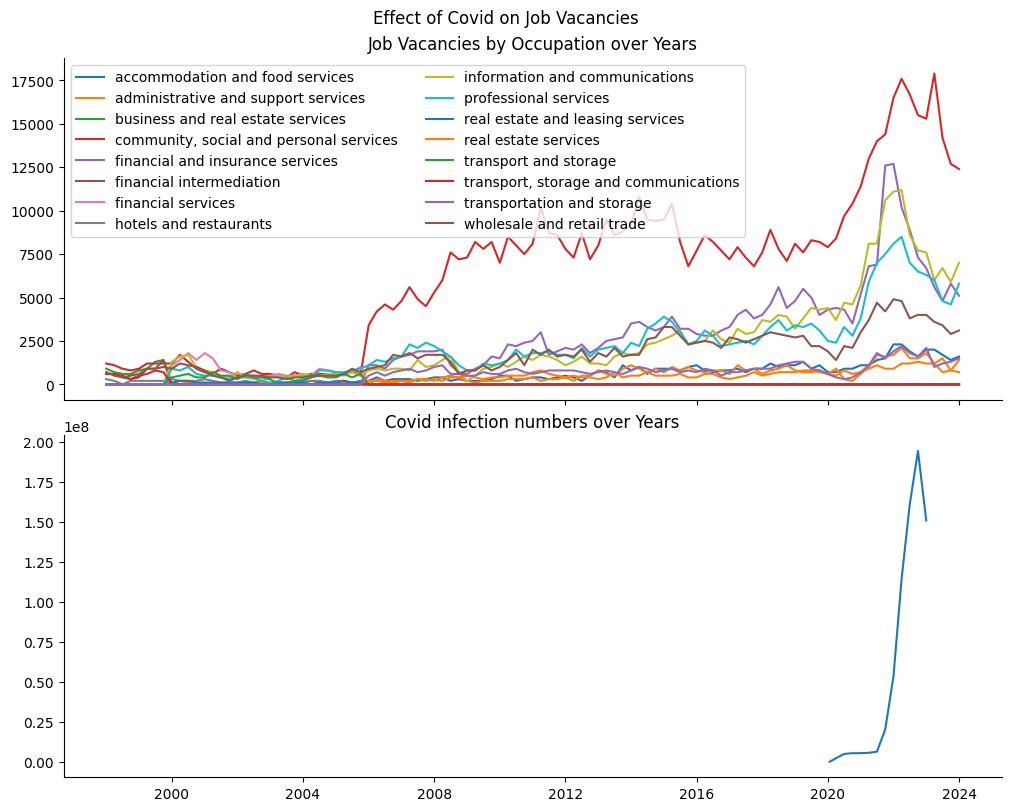

In [17]:
#@title Correlate Covid and Job Vacancy data
fig,axs=plt.subplots(2,sharex=True,figsize=(10, 8), layout='constrained')
fig.suptitle('Effect of Covid on Job Vacancies')
axs[0].plot(ind2rectotal,label=ind2rectotal.columns)
axs[0].legend(ncol=2)
sns.despine(fig=fig, ax=ax)
#axs[0].xlabel('Quarter')
#axs[0].ylabel('Vacancies')
axs[0].set_title('Job Vacancies by Occupation over Years')

axs[1].set_title('Covid infection numbers over Years')
axs[1].plot(coviddf['Date'],coviddf['cases'],label=coviddf.columns)
fig.savefig('covidvacancies.jpg')


In [18]:
!pip install google-generativeai

In [19]:
#@title formatting output to be multi line

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [20]:
#@title Using Gemma 1.5 to describe the graph

import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get("GEMINI_API_KEY"))

def upload_to_gemini(path, mime_type=None):
  file = genai.upload_file(path, mime_type=mime_type)
  print(f"Uploaded file '{file.display_name}' as: {file.uri}")
  return file

generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

files = [
  upload_to_gemini("covidvacancies.jpg", mime_type="image/jpeg"),
]

chat_session = model.start_chat(
  history=[{
      "role": "user",
      "parts": [
        files[0],
      ],
    },
  ]
)

response = chat_session.send_message("Describe the graph below")

print(response.text)

Uploaded file 'covidvacancies.jpg' as: https://generativelanguage.googleapis.com/v1beta/files/i4flvr1nd6xe
The graph shows the effect of COVID-19 on job vacancies by occupation over years. The top graph shows the number of job vacancies in each occupation from 1998 to 2023. The bottom graph shows the number of COVID-19 infections over the same time period. 

The top graph shows that the number of job vacancies in most occupations decreased during the COVID-19 pandemic, particularly in the transportation, storage and communication, wholesale and retail trade and the real estate industries. 

The bottom graph shows that the number of COVID-19 infections started to increase significantly in 2020 and peaked in 2021.

The graph suggests that the COVID-19 pandemic had a significant impact on the number of job vacancies in many industries. However, it is important to note that this is just one study and more research is needed to fully understand the long-term impacts of the pandemic on the j